# Queueing M/M/1 with FIFO

In [1]:
using Distributions
using PyPlot

In [2]:
type QueueCustomer
    time::Float64  #When do I arrrive
    service_time::Float64 #How much time it take to process my request
    wait_time::Float64 #How much time I spent waiting in the queue
    ID::Int
end 

In [3]:
function MM1_que_sim_fast(numCustomers,λ,μ)
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    arrival_queue=Array(QueueCustomer,0)
    num_of_serviced_customers=0
    t_service=0.0 #Time wrt the service station
    t_queue=0.0 # Time wrt to queue 
    wait_time_list=Float64[] #The wait time list 
    event_time=Array(Float64,2*numCustomers)
    event_type=Array(Int,2*numCustomers)
    e_idx=0
    i=0
    while num_of_serviced_customers<numCustomers #At every iteration we will service one customer and build the wait queue
        if isempty(arrival_queue) #Fill the queue up to the time at service station
            while t_queue<=t_service && i<numCustomers
                next_custmer_at=rand(interarrival_dist)
                t_queue+=next_custmer_at
                e_idx+=1
                event_time[e_idx],event_type[e_idx]=t_queue,1
                service_time=rand(proccessing_dist)
                i+=1
                qc=QueueCustomer(t_queue,service_time,Inf,i)
                push!(arrival_queue,qc)
            end
        end
        qc=shift!(arrival_queue)
        t_service=max(t_service,qc.time) 
        e_idx+=1
        event_time[e_idx],event_type[e_idx]=t_service,-1
        wait_time=t_service-qc.time
        push!(wait_time_list,wait_time)
        t_service+=qc.service_time
        num_of_serviced_customers+=1
    end
    # Proccessing the event queue
    #event_time_type=sort(event_time_type,1)
    wait_time_list,event_time,event_type
end

MM1_que_sim_fast (generic function with 1 method)

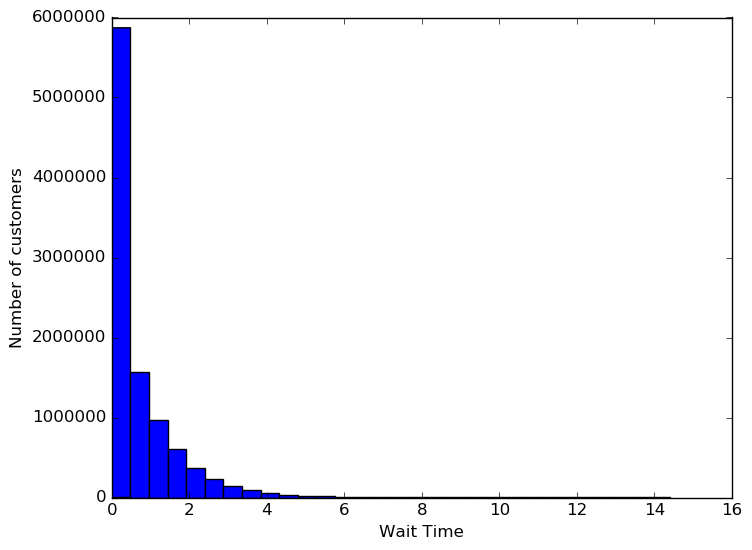

In [10]:
wait_time_list,event_time,event_type=MM1_que_sim_fast(10_000_000,2,3) # 10 million 
ax=axes();
ax[:hist](wait_time_list,30); ylabel("Number of customers"); xlabel("Wait Time");

In [19]:
sort_idx=sortperm(event_time)    
ql=cumsum(event_type[sort_idx])
max_q=maximum(ql)
time_per_ql=zeros(maximum(ql)+1)
for i=1:length(event_time)-1
    time_per_ql[ql[i+1]+1]+=event_time[sort_idx[i+1]]-event_time[sort_idx[i]]
end

In [20]:
time_per_ql

34-element Array{Float64,1}:
     4.44367e5
     3.07121e6
     4.94014e5
     3.29462e5
     2.19896e5
     1.46911e5
 98043.3      
 64858.9      
 43306.1      
 28634.2      
 19255.2      
 12773.8      
  8527.8      
     ⋮        
   179.356    
   116.609    
    74.7593   
    46.5692   
    27.2113   
    21.906    
    12.2544   
     5.66933  
     1.73562  
     0.946916 
     0.777001 
     0.07595  

In [21]:
dot(0:max_q,time_per_ql)/sum(time_per_ql)

1.8023551752456484

In [22]:
mean(ql)

1.8355944

In [23]:
sum(time_per_ql)

4.998868681466579e6

In [24]:
event_time[end]

4.998870104039491e6

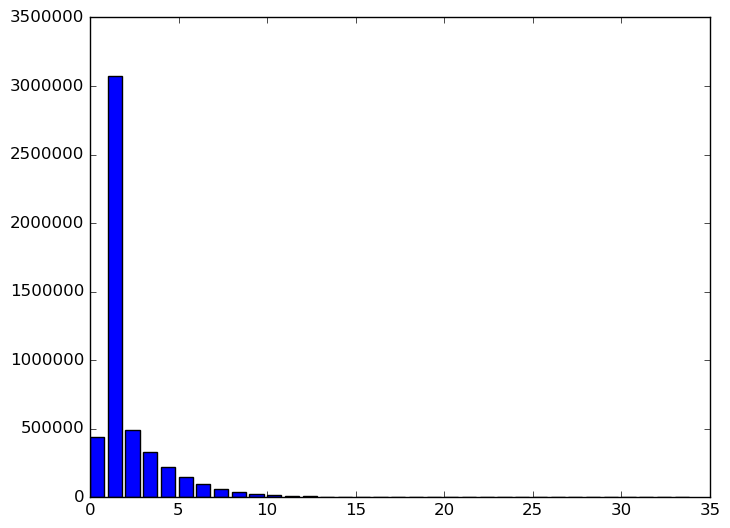

In [25]:
bar(0:max_q,time_per_ql);

In [5]:
function MM1_que_sim_fast_ql(numCustomers,λ,μ)
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    arrival_queue=Array(QueueCustomer,0)
    num_of_serviced_customers=0
    t_service=0.0 #Time wrt the service station
    t_queue=0.0 # Time wrt to queue 
    wait_time_list=Array(Float64,numCustomers) #The wait time list 
    event_time=Array(Float64,2*numCustomers)
    event_type=Array(Int,2*numCustomers)
    e_idx=0
    i=0
    while num_of_serviced_customers<numCustomers #At every iteration we will service one customer and build the wait queue
        if isempty(arrival_queue) #Fill the queue up to the time at service station
            while t_queue<=t_service && i<numCustomers
                next_custmer_at=rand(interarrival_dist)
                t_queue+=next_custmer_at
                e_idx+=1
                event_time[e_idx],event_type[e_idx]=t_queue,1
                service_time=rand(proccessing_dist)
                i+=1
                qc=QueueCustomer(t_queue,service_time,Inf,i)
                push!(arrival_queue,qc)
            end
        end
        qc=shift!(arrival_queue)
        t_service=max(t_service,qc.time) 
        e_idx+=1
        event_time[e_idx],event_type[e_idx]=t_service,-1
        wait_time=t_service-qc.time
        num_of_serviced_customers+=1
        wait_time_list[num_of_serviced_customers]=wait_time
        t_service+=qc.service_time
    end
    # Proccessing the event queue
    sort_idx=sortperm(event_time)
    ql=cumsum(event_type[sort_idx])
    max_q=maximum(ql)
    time_per_ql=zeros(maximum(ql)+1)
    for i=1:length(event_time)-1
        time_per_ql[ql[i+1]+1]+=event_time[sort_idx[i+1]]-event_time[sort_idx[i]]
    end
    avg_queue_len=dot(0:max_q,time_per_ql)/sum(time_per_ql)
    wait_time_list,avg_queue_len,time_per_ql
end

MM1_que_sim_fast_ql (generic function with 1 method)

In [28]:
wait_time_list,avg_queue_len,time_per_ql=MM1_que_sim_fast_ql(10_000_000,2,3) # 10 million 


([0.0,0.388188,0.908646,1.26285,1.25087,0.536276,0.998008,0.0479944,0.0,0.23411  …  4.23869,4.00796,4.28025,5.17316,5.1861,4.11538,3.92591,4.29685,3.07294,2.88979],1.7952111039814795,[4.4485e5,3.08005e6,4.93728e5,3.28947e5,219383.0,1.45784e5,97626.3,64979.3,43134.1,28549.2  …  0.971907,1.13352,1.537,1.21225,1.37256,2.89647,2.72913,1.40683,0.635763,0.582119])

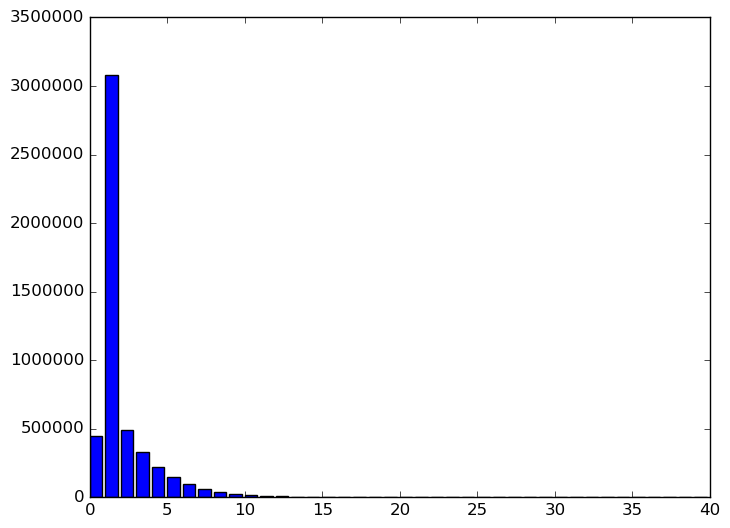

In [29]:
bar(0:length(time_per_ql)-1,time_per_ql);

In [30]:
"Deals with max queue length"
function MM1_que_sim_fast_ql_restricted(numCustomers,λ,μ,max_ql)
    interarrival_dist=Exponential(1/λ)
    proccessing_dist=Exponential(1/μ)
    arrival_queue=Array(QueueCustomer,0)
    num_of_serviced_customers=0
    t_service=0.0 #Time wrt the service station
    t_queue=0.0 # Time wrt to queue 
    wait_time_list=Array(Float64,numCustomers) #The wait time list 
    event_time=zeros(Float64,2*numCustomers)
    event_type=zeros(Int,2*numCustomers)
    serviced_before=sizehint!(Array(Int,0),numCustomers) #The number of customer serviced up to this point 
    serviced_time=sizehint!(Array(Float64,0),numCustomers)  # The time at which the service was provided
    e_idx=0
    i=0
    kickedout=0
    queue_length=0
    while num_of_serviced_customers<numCustomers #At every iteration we will service one customer and build the wait queue
        if isempty(arrival_queue) #Fill the queue up to the time at service station
            while t_queue<=t_service && i-kickedout<numCustomers
                next_custmer_at=rand(interarrival_dist)
                t_queue+=next_custmer_at
                i+=1
                service_time=rand(proccessing_dist)
                qc=QueueCustomer(t_queue,service_time,Inf,i)
                push!(arrival_queue,qc)
           end
        end
        qc=shift!(arrival_queue)
        t_service=max(t_service,qc.time) 
        if qc.ID>1
            if qc.time<serviced_time[1]
                num_time_serv=0.0
            else
                num_time_serv=serviced_before[searchsortedlast(serviced_time,qc.time)]
            end
            queue_length=qc.ID-num_time_serv-kickedout-1
            if queue_length>=max_ql
                kickedout+=1
                continue
            end
        end
        e_idx+=1
        event_time[e_idx],event_type[e_idx]=qc.time,1    
        e_idx+=1
        event_time[e_idx],event_type[e_idx]=t_service,-1
        wait_time=t_service-qc.time
        num_of_serviced_customers+=1
        wait_time_list[num_of_serviced_customers]=wait_time
        t_service+=qc.service_time
        push!(serviced_before,num_of_serviced_customers)
        push!(serviced_time,t_service)
    end
    # Proccessing the event queue
    sort_idx=sortperm(event_time)
    ql=cumsum(event_type[sort_idx])
    max_q=maximum(ql)
    time_per_ql=zeros(maximum(ql)+1)
    for i=1:length(event_time)-1
        time_per_ql[ql[i+1]+1]+=event_time[sort_idx[i+1]]-event_time[sort_idx[i]]
    end
    avg_queue_len=dot(0:max_q,time_per_ql)/sum(time_per_ql)
    wait_time_list,avg_queue_len,time_per_ql,kickedout,ql,event_time[sort_idx]
end

MM1_que_sim_fast_ql_restricted

In [31]:
wait_time_list,avg_queue_len,time_per_ql,kickedout,ql,event_time=MM1_que_sim_fast_ql_restricted(10_000_000,2,3,4) # 10 million 


([0.0,0.392505,0.135595,0.0,0.121684,0.0,0.242863,0.0,0.142079,1.55619  …  1.00789,1.07704,0.28242,0.0,0.0,0.448761,0.415104,0.386251,0.0,0.0],1.1328476666258576,[5.53324e5,3.82961e6,7.79537e5,2.46155e5],819298,[1,0,1,0,1,0,1,0,1,0  …  1,2,3,2,1,0,1,0,1,0],[0.509667,0.509667,0.572238,0.964743,1.06155,1.19715,1.51787,1.51787,1.60085,1.72253  …  5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6,5.40862e6])

In [32]:
time_per_ql

4-element Array{Float64,1}:
 5.53324e5
 3.82961e6
 7.79537e5
 2.46155e5

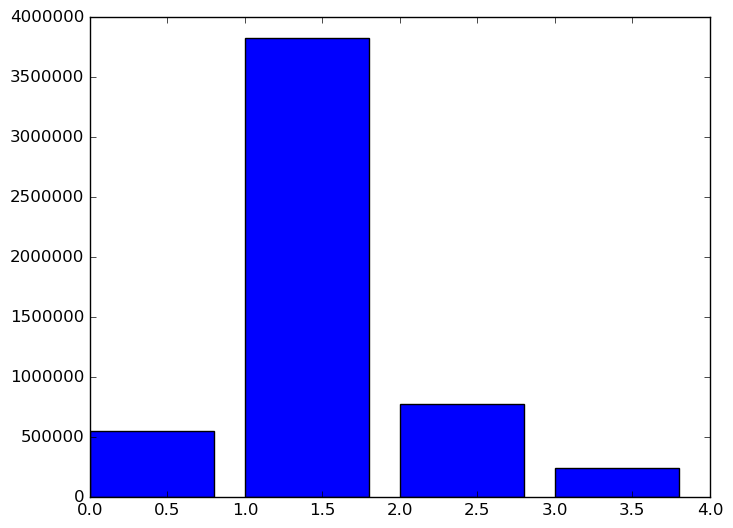

In [33]:
bar(0:length(time_per_ql)-1,time_per_ql);

In [35]:
avg_queue_len

1.1328476666258576

In [36]:
kickedout

819298